# <center>基于多项式的曲线拟合方法与分析    </center>
<center> 吴宇航 31520201153897    </center>
<center> 厦门大学人工智能系    </center>
<center> 31520201153897@stu.xmu.edu.cn    </center>

## 摘要

本文首先回顾了的多项式拟合的历史。随后本文给出了多项式拟合的定义与优化目标，并分析了多项式拟合能力。其次本文探索了求解多项式权重的不同方法，包括直接计算解析解、霍夫变换和RANSAC 随机采样一致性算法。最后本文进行了多项式拟合的实验。实验内容包括生成带有随机噪声的测试数据，对不同阶多项式模型进行拟合，查看了他们的权重，计算了他们在训练集和测试集下的根均方误差，并对拟合结果进行可视化，以及设置不同程度的正则化系数进行拟合。
    

## Abstract

This paper first reviews the history of polynomial fitting. Then this paper gives the definition of polynomial fitting and optimization objectives, and analyzes the ability of polynomial fitting. Secondly, this paper explores different methods to solve polynomial weight, including direct calculation of analytic solution, Hough transform and RANSAC random sampling consistency algorithm. Finally, the polynomial fitting experiment is carried out. The experiment includes generating test data with random noise, fitting different order polynomial models, checking their weights, calculating their root mean square error in the training set and test set, visualizing the fitting results, and setting different degrees of regularization coefficient for fitting.

## 引言

多项式拟合在机器学习中有着重要的应用。在统计学中，多项式回归是回归分析的一种形式，其中自变量x和因变量y之间的关系被建模为x中的n次多项式。多项式回归可以拟合x的值和y的相应条件均值之间的非线性关系。

多项式回归模型通常用最小二乘法拟合。在高斯-马尔可夫定理的条件下，最小二乘法使系数的无偏估计的方差最小化。1805年勒让德和1809年高斯分别发表了最小二乘法。多项式回归实验的第一个设计出现在Gergonne 1815年的一篇论文中。在二十世纪，多项式回归在回归分析的发展中发挥了重要的作用，且越来越重视设计和推理问题。最近，多项式模型的使用得到了其他方法的补充，其中非多项式模型对某些问题具有优势。

## 多项式模型与算法求解

### 模型

#### 模型定义：

回归分析目的是用自变量（或自变量向量）x的值来拟合因变量y的期望值。

一个典型的N阶多项式模型定义如下：

$$
y=\sum_{i=1}^{N}\beta_{i}x^{i}+\beta_0
$$

其中：x为自变量（输入数据），y为因变量（预测值），$ \beta_i $ 为参数，又因为$ x^{0}=1 $, 所以定义可以压缩为：

$$
y=\sum_{i=0}^{n}\beta_{i}x^{i}
$$

对于批量数据，这里给出多项式模型的矩阵形式：

设批量大小为m，阶数为n，

$$
Y=X\beta
$$

其中：

​		Y 是预测值，其为列向量，尺寸为$ (m,1) $。

​		X 是批量数据的范德蒙矩阵，尺寸为$(m,n+1)$，$X(i,:)=(x_i^0,x_i^1,...,x_i^{n})$ ，

​		$\beta$ 是参数，其为列向量，尺寸为$ (n+1,1) $，

#### 优化目标：

一般情况下，优化目标为最小均方根误差（root-mean-square，RMS），多项式模型 $ y(x,w) $ 的RMS定义为：

$$
Loss=\sqrt{\frac{\sum_{j=0}^{M}(y(x_j,w)-t_j)^{2}}{M}} 
$$

其中：

​		$ M $ 为样本数

​		$ x_j $为第j个样本

​		$t_j$为第j个标签，与样本成对出现

则模型参数 $\beta$ 优化公式为：

$$
\hat{\beta}=\underset{\beta}{argmin}(Loss)
$$

得到了明确的优化公式，便可以采用各种办法进行求解。

### 多项式拟合能力

一个高阶多项式可以“过拟合”任意数据，即多项式函数可以拟合任何连续函数，这一论断来源于泰勒公式。

**泰勒公式**是一种计算近似值的方法，它是一个用函数某点的信息描述在该点附近取值的公式。已知函数在某一点的各阶导数值的情况之下，泰勒公式可以用这些导数值做系数构建一个多项式来逼近函数在这一点的邻域中的值。

若$ f(x) $ 在$x_0$ 处有任意阶导数，则泰勒公式定义为：

$$
\begin{align}
f(x)&= f(x_0)+(x-x_0)f^{'}(x_0)+(x-x_0)^2\frac{f^{''}(x_0)}{2!}+....+(x-x_0)^n\frac{f^{n}(x_0)}{n!} \\
    &= \sum_{n=0}^{\infty}\frac{f^n(x_0)}{n!}(x-x_0)^n
\end{align}
$$

这里$x_0$为可求解的参数，则它的各阶导数值均可以视为参数，那么泰勒展开式就是$f(x)$为关于$ x $ 的多项式展开。

将展开式中的同阶$x^n$系数合并简化后，可以由泰勒公式推导出多项式拟合公式：

$$
f(x)=\sum_{n=0}^{\infty}\beta_nx^n
$$

### 算法

#### 解析解

多项式RMS可以直接得到解析解：

$$
\hat{\beta}={(X^TX)}^{-1}X^TY
$$

对于带有L2正则化的多项式RMS，也可以直接得到解析解：

$$
\hat{\beta}={(X^TX+\lambda{I})}^{-1}X^TY
$$

但直接计算解析解的方式在实际应用中并不多，主要有两个原因：

1. 矩阵求逆的操作，运算复杂度较高，一般为 $ O(N^2log(N)) $ ，已发现的最快求逆算法的复杂度为 $O(N^{2.37286})$ 

2. 实际应用中可能会出现多项式的病态方程，其影响是在求解矩阵逆的过程中，运算出现的微小误差会导致解误差的急剧放大，从而无法得到满足精度要求的参数解。

为了避免病态方程带来的问题，实际应用中多采用迭代法、LU分解法等进行求解。

#### **霍夫变换**

霍夫变换常用于图像处理中，是从图像中识别几何形状的基本方法之一。

**基本原理**：用点与线的对偶性，将原始图像空间中的给定曲线通过曲线表达形式变为参数空间的一个点。将原始图像中的曲线检测问题转化成寻找参数空间中的峰值问题。具体到直线拟合中，设待检测直线方程为y=k*x+b, 则对于某数据点 $ (x_0,y_0)$ 有：
$$
b=x_0\ k-y_0
$$

即每个数据点映射到参数空间后都对应着一条直线，N个数据点就有N条直线，那么参数空间中距这些直线最近的点，就是拟合直线的参数。

在实际应用中，因为 $ y=k*x+b $ 形式的直线方程无法表示 $ x=c $ 形式的直线，所以采用极坐标系$(p,\theta )$下的参数方程 $ p=x*cos(\theta )+y*sin(\theta ) $ 进行拟合

##### **算法流程**：

1. 给定一个参数范围，如 $[ \rho_1 , \rho_2 ]$ , $[\theta_1 , \theta_2]$
2. 按给定步长遍历参数范围，对每个参数对 $[\rho_i,\theta_i]$：
  - 遍历所有数据点，对每个数据点 $[x_j,y_j]$ :
  - 构造直线方程 $\rho = x_j*cos(\theta_i )+y_j*sin(\theta_i ) $：
  - 若 $Loss(\rho_i,\rho)$ 的误差小于阈值，则给这个参数对投一票
3. 在完成所有遍历后，取得票最高的参数对作为拟合直线

##### 优缺点：

**优点**：相较于最小二乘法，霍夫变换可以在多种信号混杂的情况下提取特定模式的信号

**缺点**：
  1. 算法的精确性取决于步长大小，步长大则效果差，但步长小又难以找到峰值
  2. 每个数据点的权重相同，模型容易受噪声影响

#### RANSAC

**基本假设**：样本中包含正确数据，也包含异常数据，即数据集中含有噪声。

##### **算法流程**：

1. 在数据中随机均匀的选择几个点作为内群点
   - 拟合选择的内群点
2. 将其他点代入拟合的模型，通过阈值threshold判断是否为内群
   - 如果是，则加入内群，并重新拟合
3. 记录最终内群点数量
4. 重复1-3步骤多次
5. 比较哪次迭代中内群点数量最多，最多内群点所拟合的模型就是我们所要求的解

##### 优缺点：

**优点**：算法稳定性好，可以有效避免离群点噪声干扰

**缺点**：
1. 迭代次数无明确上限；需要设置迭代次数上限，但所得结果可能不是最优结果
2. 只能从特定数据集中估计出一个模型，如果存在多个模型，RANSAC不能找到别的模型




## 实验结果与分析



In [1]:
import os
import sys
import numpy as np
import struct
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sys.path.append(os.path.dirname(os.getcwd()))
from Framework import datasets, models, utils, mocks

### 数据集的产生


In [2]:
x_r,dots,y_r=(0,2*np.pi),10,(-1,1) # 设置数据参数
noiser=mocks.Uniform_noise((2,),(-0.2,0.3)) # 设置噪声参数
mocker= mocks.Single_sin_mock(x_ranger=x_r,number=dots,y_ranger=y_r,noise_generator=noiser)
data=mocker.generate()
c_data=mocker.generate_no_noise()

test_mocker=mocks.Single_sin_mock(x_ranger=x_r,number=6,y_ranger=y_r,noise_generator=noiser)
test_data=test_mocker.generate()

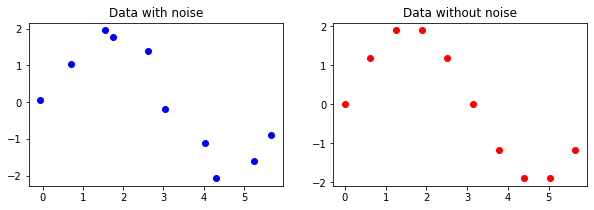

In [3]:
plt.figure(figsize=(10,3))
plt.subplot(121).set_title("Data with noise")
plt.scatter(data[:,1],data[:,0],c='b',label="data")
plt.subplot(122).set_title("Data without noise")
plt.scatter(c_data[:,1],c_data[:,0],c='r',label="data")
plt.show()

### 实验1 不同阶多项式拟合的参数


In [4]:
model_list=[models.linear_regression(i) for i in range(10)] #构造 0-9 阶的多项式模型
a=[ model.fit(data) for model in model_list ] #拟合多项式
# 输出阶数为0，1，3，6，9 多项式模型的拟合结果
a=[print("Rank is：",i," - ",model_list[i].w.round(1)) for i in [0,1,3,6,9]]

Rank is： 0  -  0.0
Rank is： 1  -  [ 1.6 -0.5]
Rank is： 3  -  [-0.   3.3 -1.6  0.2]
Rank is： 6  -  [ 0.1  0.3  2.5 -1.9  0.5 -0.   0. ]
Rank is： 9  -  [  -5.   -77.   338.6 -526.6  424.7 -199.4   56.5   -9.5    0.9   -0. ]


### 实验2 不同阶多项式拟合的最小Ems损失


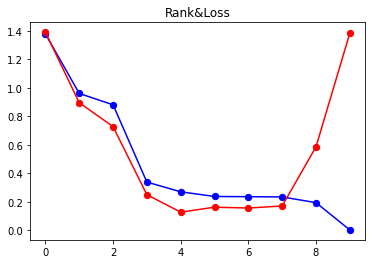

In [5]:
y,x=data[:,0],data[:,1]
loss,test_loss=[],[]
for i,model in enumerate(model_list):
    p=model.predict(x)
    ems=np.sqrt(np.mean((y-p)**2))
    loss.append(ems)
    
    test_p=model.predict(test_data[:,1])
    test_ems=np.sqrt(np.mean((test_data[:,0]-test_p)**2))
    test_loss.append(test_ems)
    
plt.figure()
plt.title("Rank&Loss")
plt.plot([i for i in range(10)],loss,'b')
plt.scatter([i for i in range(10)],loss,color = 'blue',marker='o',s = 40)
plt.plot([i for i in range(10)],test_loss,'r')
plt.scatter([i for i in range(10)],test_loss,color = 'red',marker='o',s = 40)
plt.show()

### 实验3 不同阶多项式拟合的可视化


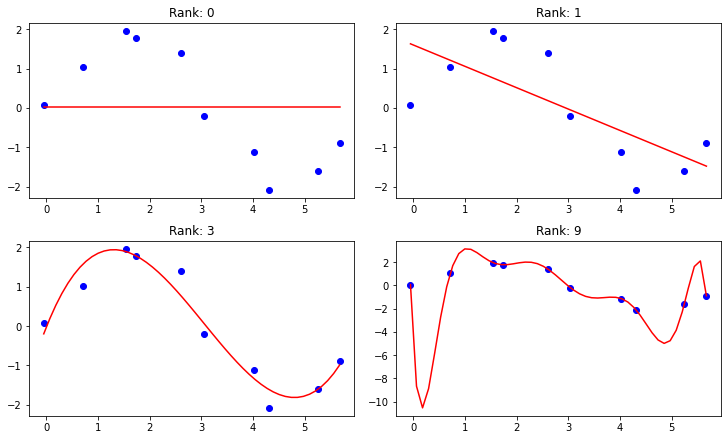

In [6]:
fig,axs=plt.subplots(2,2,constrained_layout=True,figsize=(10,6))
axs=axs.flat
upper=np.max(data[:,1])
lower=np.min(data[:,1])
for index,i in enumerate([0,1,3,9]):
    model=model_list[i]
    x=np.linspace(lower,upper,num=50)
    y=model.predict(x) 
    
    axs[index].set_title("Rank: "+str(model.rank))
    axs[index].plot(x,y,c='r')
    axs[index].scatter(data[:,1],data[:,0],c='b',label="data")

plt.show()

### 实验4 数据集大小对高阶多项式拟合的影响


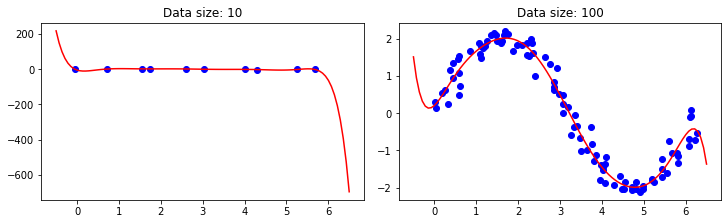

In [7]:
big_number=100
big_mocker=mocks.Single_sin_mock(x_ranger=x_r,number=big_number,y_ranger=y_r,noise_generator=noiser)
big_data=big_mocker.generate()
big_model=models.linear_regression(9)
big_model.fit(big_data)

x=np.linspace(-0.5,6.5,num=100)

fig,axs=plt.subplots(1,2,constrained_layout=True,figsize=(10,3))
axs=axs.flat
compare,datasize,group=[model_list[-1],big_model],[10,big_number],[data,big_data]
for index,model in enumerate(compare):
    axs[index].set_title("Data size: "+str(datasize[index]))
    axs[index].plot(x,model.predict(x),c='r')
    axs[index].scatter(group[index][:,1],group[index][:,0],c='b')

plt.show()

### 实验5 正则化项的作用

In [8]:
lambda_list=np.linspace(-40,0,num=41)
model_l_list=[ models.linear_regression(9,np.e**i) for i in lambda_list ]
a=[ model.fit(data) for model in model_l_list ] #拟合多项式

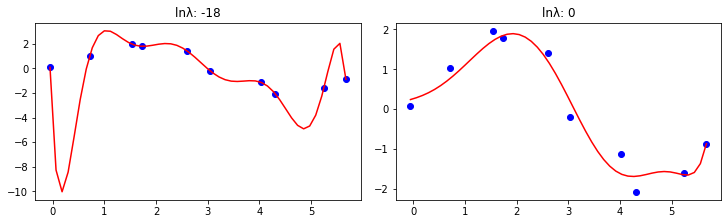

In [9]:
fig,axs=plt.subplots(1,2,constrained_layout=True,figsize=(10,3))
axs=axs.flat
upper=np.max(data[:,1])
lower=np.min(data[:,1])
for index,i in enumerate([-19,-1]):
    model=model_l_list[i]
    x=np.linspace(lower,upper,num=50)
    y=model.predict(x) 
    
    axs[index].set_title("lnλ: "+str(i+1))
    axs[index].plot(x,y,c='r')
    axs[index].scatter(data[:,1],data[:,0],c='b',label="data")
plt.show()

### 实验6 不同程度正则化的影响

#### 查看正则化后的系数

In [10]:
a=[print("lnλ",np.log(model.l2),": ",model.w.round(1)) for model in [model_list[9],model_l_list[-19],model_l_list[-1]]]

lnλ -inf :  [  -5.   -77.   338.6 -526.6  424.7 -199.4   56.5   -9.5    0.9   -0. ]
lnλ -18.0 :  [  -4.8  -73.6  324.3 -505.3  408.2 -192.    54.5   -9.2    0.8   -0. ]
lnλ 0.0 :  [ 0.3  0.4  0.3  0.2  0.  -0.1  0.   0.  -0.   0. ]


#### 正则化与损失

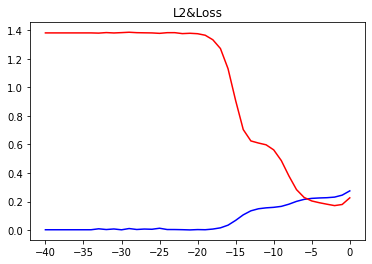

In [11]:
y,x=data[:,0],data[:,1]
loss,test_loss=[],[]
for i,model in enumerate(model_l_list):
    p=model.predict(x)
    ems=np.sqrt(np.mean((y-p)**2))
    loss.append(ems)
    
    test_p=model.predict(test_data[:,1])
    test_ems=np.sqrt(np.mean((test_data[:,0]-test_p)**2))
    test_loss.append(test_ems)
    
plt.figure()
plt.title("L2&Loss")
plt.plot([i for i in lambda_list],loss,'b')
plt.plot([i for i in lambda_list],test_loss,'r')
plt.show()